<a href="https://colab.research.google.com/github/Xylenox/CAP4630/blob/master/HW_3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# functions for graphing heatmaps

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
  
def f(x, y, w1, w2, b):
  res = np.zeros(x.shape)
  for i in range(0, x.shape[0]):
    for j in range(0, x.shape[1]):
      res[i][j] = sigmoid(x[i][j]*w1 + y[i][j]*w2 + b)
  return res

print(sigmoid(np.array([0, -1, 1])))

[0.5        0.26894142 0.73105858]


# Random data generation (Problem 1)


In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.zeros((m, 2))
  labels = np.zeros((m, 1))

  for i in range(0, m):
    rand = np.random.random()
    c = 0
    if rand > 0.5:
      c = 0
    else:
      c = 1
    x = np.random.random()
    n = np.random.normal(mu, sigma)
    y = w*x + b + ((-1)**c) * n
    data[i][0] = x
    data[i][1] = y
    labels[i] = c
  return (data, labels)

def display_random_data(data, labels, w, b, m, ax):
  for i in range(0, m):
    if labels[i] == 0:
      ax.plot(data[i][0], data[i][1], 'r.')
    else:
      ax.plot(data[i][0], data[i][1], 'b.')

# Generating random data

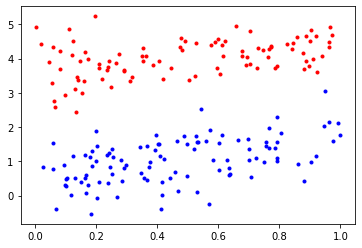

In [0]:
w = 1
b = 2
mu = 1.5
sigma = 0.5
m = 200
test = int(m*0.8)

data, labels = get_random_data(w, b, mu, sigma, m)

data_train = data[:test]
labels_train = labels[:test]
data_test = data[test:]
labels_test = labels[test:]
display_random_data(data, labels, w, b, m, plt)

# Logistic Regression with Keras (Problem 2)

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow.keras as keras
import tensorflow as tf

TensorFlow 2.x selected.


# Build and compile network

In [0]:
network = models.Sequential()
layer = layers.Dense(1, activation='sigmoid', input_shape=(2,))
network.add(layer)
network.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train Network

In [0]:
network.fit(data_train, labels_train, epochs=50, batch_size=5)

Train on 160 samples
Epoch 1/50
160/160 [==============================] - 0s 1ms/sample - loss: 0.6558 - accuracy: 0.4875
Epoch 2/50
160/160 [==============================] - 0s 251us/sample - loss: 0.6297 - accuracy: 0.4938
Epoch 3/50
160/160 [==============================] - 0s 249us/sample - loss: 0.6087 - accuracy: 0.5188
Epoch 4/50
160/160 [==============================] - 0s 251us/sample - loss: 0.5894 - accuracy: 0.5562
Epoch 5/50
160/160 [==============================] - 0s 243us/sample - loss: 0.5719 - accuracy: 0.5875
Epoch 6/50
160/160 [==============================] - 0s 232us/sample - loss: 0.5552 - accuracy: 0.6187
Epoch 7/50
160/160 [==============================] - 0s 232us/sample - loss: 0.5392 - accuracy: 0.6375
Epoch 8/50
160/160 [==============================] - 0s 302us/sample - loss: 0.5240 - accuracy: 0.6625
Epoch 9/50
160/160 [==============================] - 0s 245us/sample - loss: 0.5094 - accuracy: 0.6875
Epoch 10/50
160/160 [========================

In [0]:
test_loss, test_acc = network.evaluate(data_test, labels_test)

40/40 [==============================] - 0s 2ms/sample - loss: 0.2334 - accuracy: 1.0000


In [0]:
print(layer.weights)
print(layer.bias)

[<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.3903009],
       [-1.0774552]], dtype=float32)>, <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([2.0651717], dtype=float32)>]
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([2.0651717], dtype=float32)>


# Formula for extracting seperating line given weights and bias

$w_1*x + w_2*y + b = 0$

$w_2*y = -w_1*x - b$

$y = -w_1*x/w_2 - b/w_2$

# Plotting network output and heatmap

tf.Tensor(1.9167124, shape=(), dtype=float32)
tf.Tensor(0.3622433, shape=(), dtype=float32)


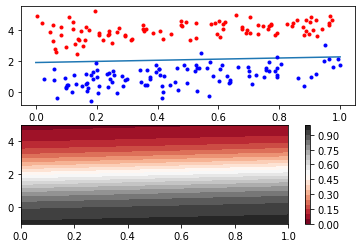

In [0]:
test_b = -layer.bias[0]/layer.weights[0][1][0]
test_w = -layer.weights[0][0][0]/layer.weights[0][1][0]
# display_random_data(data, labels, w, b, m)
print(test_b)
print(test_w)
ax = plt.subplot(2, 1, 1)
plt.plot(np.array([0, 1]), np.array([test_b, test_b+test_w]))
display_random_data(data, labels, w, b, m, ax)


x = np.linspace(0, 1, 20)
y = np.linspace(-1, 5, 20)

X, Y = np.meshgrid(x, y)
Z = f(X, Y, layer.weights[0][0][0], layer.weights[0][1][0], layer.bias[0])

ax = plt.subplot(2, 1, 2)
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

# Manual Logistic Regression (Problem 3)

# Initialize weights

In [0]:
ws = np.zeros(3)
lr = 0.01
epochs = 20
batch_size = 20

# Run epochs

In [0]:
datab = np.hstack((data_train, np.ones((data_train.shape[0], 1))))
for epoch in range(0, epochs):
  shuffle = np.random.permutation(datab.shape[0])
  sample_data = datab[shuffle]
  sample_labels = labels_train[shuffle]
  for i in range(0, m, batch_size):
    datas = sample_data[i:i+batch_size]
    label = sample_labels[i:i+batch_size]
    ws = (ws - 1 / test * np.sum((np.array([sigmoid(datas.dot(ws))]).T - label)*datas, axis=0))
  print(ws)

[ 0.04239962 -0.36649227  0.11149659]
[ 0.12499539 -0.43983006  0.29861895]
[ 0.19969966 -0.51767723  0.46839555]
[ 0.27437261 -0.56037603  0.6364599 ]
[ 0.33853382 -0.63297247  0.78203037]
[ 0.40159909 -0.68773695  0.92231478]
[ 0.4617569  -0.73252081  1.05624468]
[ 0.51814595 -0.77442163  1.18173115]
[ 0.56808938 -0.83232316  1.29336608]
[ 0.61598094 -0.88483467  1.39952564]
[ 0.66270416 -0.92764616  1.50219477]
[ 0.70766564 -0.96376573  1.60101224]
[ 0.74878169 -1.00860502  1.69153113]
[ 0.79034476 -1.0392031   1.78191357]
[ 0.82832539 -1.07791935  1.86486052]
[ 0.86616871 -1.10801952  1.94658122]
[ 0.90082949 -1.14606829  2.02155742]
[ 0.93547175 -1.175272    2.09611538]
[ 0.96723019 -1.2120861   2.16462208]
[ 0.99891563 -1.24187451  2.23279578]


# Plot predictions and heatmap

1.7979238328293285
0.8043611653431489


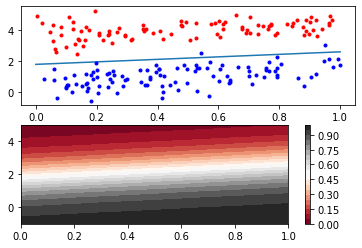

In [0]:
test_b = -ws[2]/ws[1]
test_w = -ws[0]/ws[1]
# display_random_data(data, labels, w, b, m)
print(test_b)
print(test_w)
ax = plt.subplot(2, 1, 1)
plt.plot(np.array([0, 1]), np.array([test_b, test_b+test_w]))
display_random_data(data, labels, w, b, m, ax)


x = np.linspace(0, 1, 20)
y = np.linspace(-1, 5, 20)

X, Y = np.meshgrid(x, y)
Z = f(X, Y, ws[0], ws[1], ws[2])

ax = plt.subplot(2, 1, 2)
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()